In [14]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
pCTRval = pd.read_csv('E:\\web_economics\\pCTRval.csv')
df_val = pd.read_csv('E:\\web_economics\\validation.csv')

## Bidding below Max eCPC

bid = maxEcpc * pCTR

In [16]:
adv = df_val.advertiser.unique()
table = pd.DataFrame(columns=['eCPC'])
ecpcs = []
for i in range(len(adv)):
    ad = adv[i]
    df = df_val[df_val.advertiser == ad]
    clicks = df.click.sum()
    costs = df.payprice.sum()
    ecpcs.append(costs / clicks)
table['eCPC'] = ecpcs
maxECPC = table['eCPC'].max()

In [17]:
def maxecpc_bid_generator():
    #bid = maxEcpc * pCTR
    bids = []
    for p in pCTRval['0']:
        bid = maxECPC * p
        bids.append(bid)

    return bids

In [18]:
ecpcs = pd.DataFrame()
ecpcs['bids'] = maxecpc_bid_generator()
df_val_temp = pd.concat([df_val, ecpcs],axis=1)
df_val_temp

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,bids
0,0,5,14,91c6a6b9e90c0f54d3230815a5a3e22e,1,u_Vhk7C5STO8TZ3s8,windows_ie,14.122.240.*,216,232,...,0,1,0,449a22cd91d9042eda3d3a1b89a22ea8,227,102,0f951a030abdaedd733ee8d114ce2944,3427,"10006,10063,10059,10111",37.799027
1,0,3,14,24b3621ad3b063b6c09c541781d534b3,1,u_DANDbCAksMy,android_safari,116.22.55.*,216,217,...,FirstView,Na,118,11908,277,118,null,2997,null,1758.302668
2,0,1,13,6e7bce0a9ad42f479827d37bf9618a9d,1,u_VhkxPnKHPo1H3Vb,windows_ie,60.215.242.*,146,149,...,0,0,70,d01411218cc79bc49d2a4078c4093b76,241,77,b2e35064f3549d447edbbdfb1f707c8c,3427,null,198.347209
3,0,5,18,6873feca381b8293bf418ba8408a014c,1,u_Vh5zL3B83ln9Xbl,windows_chrome,27.193.87.*,146,148,...,0,0,70,c46090c887c257b61ab1fa11baee91d8,241,77,0f951a030abdaedd733ee8d114ce2944,3427,null,198.200852
4,0,5,14,7e6430333c552cf0b32bb21dc792d2df,1,u_VhKPOr5wOt9HQsj,windows_ie,183.228.214.*,275,275,...,2,0,5,ff5123fb9333ca095034c62fdaaf51aa,300,178,361e128affece850342293213691a043,3386,null,107.780005
5,0,1,16,903211f027ca70f611544f42b94db094,1,u_VhTTPRKdOIm2Q-C,windows_chrome,116.52.130.*,308,309,...,0,1,0,e1af08818a6cd6bbba118bb54a651961,238,49,a5d0bde104fea52ea466c77b37948424,3476,"10077,10075,10059,10052,10083,10031,10057,1000...",278.058745
6,0,3,18,15274113eac79b065e186c1962c33632,1,u_Vh5hL5mAOIuVemB,windows_ie,180.173.153.*,79,79,...,0,0,52,b90c12ed2bd7950c6027bf9c6937c48a,300,52,361e128affece850342293213691a043,3386,null,143.525546
7,0,2,0,9c963e762671efbc15c4e9fb3cef9c46,1,u_DAN0n0B6z9B,windows_ie,124.117.229.*,374,375,...,FirstView,Na,0,10717,294,86,null,2821,null,72.446871
8,0,0,7,a483f16043e9f0057d542ee724cd81cb,1,u_VhkrLAFj3cnslVk,windows_ie,14.108.1.*,275,275,...,0,0,50,e1af08818a6cd6bbba118bb54a651961,254,212,a5d0bde104fea52ea466c77b37948424,3476,"10063,10006,10059,10083,13403,10031,10110",26.369690
9,0,0,7,2da6d0891a81ac8233bba9bcffde2159,1,u_VhkSOxduLTmcjmL,windows_chrome,60.171.29.*,106,110,...,2,0,5,48f2e9ba15708c0146bda5e1dd653caa,300,40,bebefa5efe83beee17a3d245e7c5085b,1458,"10031,13042,10006,10110",261.913165


In [19]:
data1= pd.DataFrame(columns=['clicks','imps','spent','CTR','CPC','CPM'])
lists = {'clicks':[], 'imps':[], 'spent':[], 'ctr':[], 'cpc':[], 'cpm':[]}

budget = 6250000.0
imps = 0
clicks = 0
spent = 0
for i in range(0,len(df_val_temp)):
    payprice = df_val_temp.payprice[i]
    bid = df_val_temp.bids[i]
    if budget < payprice:
        break
    if bid >= payprice:
        imps = imps + 1
        clicks = clicks + df_val_temp.click[i]
        budget = budget - payprice
        spent = spent + payprice
spent = spent / 1000
ctr = ((clicks / imps) * 100).round(4).astype(str)
cpm = ((spent / imps) * 1000).round(4).astype(str)
cpc = (spent / clicks).round(4).astype(str)
lists['clicks'].append(clicks)
lists['imps'].append(imps)
lists['spent'].append(spent)
lists['ctr'].append(ctr)
lists['cpc'].append(cpc)
lists['cpm'].append(cpm)

data1.clicks = lists['clicks']
data1.imps = lists['imps']
data1.spent = lists['spent']
data1.CTR = lists['ctr']
data1.CPC = lists['cpc']
data1.CPM = lists['cpm']
data1

,clicks,imps,spent,CTR,CPC,CPM
0,135,108818,6249.948,0.1241,46.2959,57.4349


## Step function bidding

if pctr / avgCTR >= threshold, bid max value (300), else bid 0

In [20]:
data2 = pd.DataFrame(columns=['r','clicks','imps','spent','CTR','CPC','CPM'])
lists = {'r':[],'clicks':[], 'imps':[], 'spent':[], 'ctr':[], 'cpc':[], 'cpm':[]}

ratios = np.linspace(0.8,0.9,10)
avgCTR = df_val.click.sum() / df_val.bidid.count()

maxr = 0
maxv = -1
for ratio in ratios:
    budget = 6250000.0
    imps = 0
    clicks = 0
    spent = 0    
    for i in range(0,len(pCTRval)):
        r = pCTRval['0'][i] / avgCTR
        if r >= ratio:
            bid = 300
            if budget < payprice:
                break
            if bid >= payprice:
                imps = imps + 1
                clicks = clicks + df_val_temp.click[i]
                budget = budget - payprice
                spent = spent + payprice
    spent = spent / 1000
    ctr = ((clicks / imps) * 100)
    cpm = ((spent / imps) * 1000)
    cpc = (spent / clicks)
    if clicks > maxv:
        maxr = ratio
        maxv = clicks
    lists['r'].append(ratio)
    lists['clicks'].append(clicks)
    lists['imps'].append(imps)
    lists['spent'].append(spent)
    lists['ctr'].append(ctr)
    lists['cpc'].append(cpc)
    lists['cpm'].append(cpm)

data2.r = lists['r']
data2.clicks = lists['clicks']
data2.imps = lists['imps']
data2.spent = lists['spent']
data2.CTR = lists['ctr']
data2.CPC = lists['cpc']
data2.CPM = lists['cpm']
data2 = data2.iloc[np.where(data2.r == maxr)[0]]
data2

,r,clicks,imps,spent,CTR,CPC,CPM
6,0.866667,108,39062,6249.92,0.276484,57.86963,160.0


## ORTB bidding

formula = sqrt(c/lambda * pctr + c**2) - c

In [21]:
def ortb_bid_generator():
    #formula = sqrt(c/lambda pctr + c**2) - c
    c = 6
    lamda = 5e-07
    bids = []
    for p in pCTRval['0']:
        bid = np.sqrt((c/lamda * p) + c**2) - c 
        bids.append(bid)

    return bids

In [22]:
ortbs = pd.DataFrame()
ortbs['bids'] = ortb_bid_generator()
df_val_temp = pd.concat([df_val, ortbs],axis=1)
df_val_temp

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,bids
0,0,5,14,91c6a6b9e90c0f54d3230815a5a3e22e,1,u_Vhk7C5STO8TZ3s8,windows_ie,14.122.240.*,216,232,...,0,1,0,449a22cd91d9042eda3d3a1b89a22ea8,227,102,0f951a030abdaedd733ee8d114ce2944,3427,"10006,10063,10059,10111",37.953129
1,0,3,14,24b3621ad3b063b6c09c541781d534b3,1,u_DANDbCAksMy,android_safari,116.22.55.*,216,217,...,FirstView,Na,118,11908,277,118,null,2997,null,291.029970
2,0,1,13,6e7bce0a9ad42f479827d37bf9618a9d,1,u_VhkxPnKHPo1H3Vb,windows_ie,60.215.242.*,146,149,...,0,0,70,d01411218cc79bc49d2a4078c4093b76,241,77,b2e35064f3549d447edbbdfb1f707c8c,3427,null,93.922258
3,0,5,18,6873feca381b8293bf418ba8408a014c,1,u_Vh5zL3B83ln9Xbl,windows_chrome,27.193.87.*,146,148,...,0,0,70,c46090c887c257b61ab1fa11baee91d8,241,77,0f951a030abdaedd733ee8d114ce2944,3427,null,93.885519
4,0,5,14,7e6430333c552cf0b32bb21dc792d2df,1,u_VhKPOr5wOt9HQsj,windows_ie,183.228.214.*,275,275,...,2,0,5,ff5123fb9333ca095034c62fdaaf51aa,300,178,361e128affece850342293213691a043,3386,null,67.769223
5,0,1,16,903211f027ca70f611544f42b94db094,1,u_VhTTPRKdOIm2Q-C,windows_chrome,116.52.130.*,308,309,...,0,1,0,e1af08818a6cd6bbba118bb54a651961,238,49,a5d0bde104fea52ea466c77b37948424,3476,"10077,10075,10059,10052,10083,10031,10057,1000...",112.247756
6,0,3,18,15274113eac79b065e186c1962c33632,1,u_Vh5hL5mAOIuVemB,windows_ie,180.173.153.*,79,79,...,0,0,52,b90c12ed2bd7950c6027bf9c6937c48a,300,52,361e128affece850342293213691a043,3386,null,79.057507
7,0,2,0,9c963e762671efbc15c4e9fb3cef9c46,1,u_DAN0n0B6z9B,windows_ie,124.117.229.*,374,375,...,FirstView,Na,0,10717,294,86,null,2821,null,54.578065
8,0,0,7,a483f16043e9f0057d542ee724cd81cb,1,u_VhkrLAFj3cnslVk,windows_ie,14.108.1.*,275,275,...,0,0,50,e1af08818a6cd6bbba118bb54a651961,254,212,a5d0bde104fea52ea466c77b37948424,3476,"10063,10006,10059,10083,13403,10031,10110",30.859446
9,0,0,7,2da6d0891a81ac8233bba9bcffde2159,1,u_VhkSOxduLTmcjmL,windows_chrome,60.171.29.*,106,110,...,2,0,5,48f2e9ba15708c0146bda5e1dd653caa,300,40,bebefa5efe83beee17a3d245e7c5085b,1458,"10031,13042,10006,10110",108.772477


In [23]:
data3 = pd.DataFrame(columns=['clicks','imps','spent','CTR','CPC','CPM'])
lists = {'clicks':[], 'imps':[], 'spent':[], 'ctr':[], 'cpc':[], 'cpm':[]}

budget = 6250000.0
imps = 0
clicks = 0
spent = 0
for i in range(0,len(df_val_temp)):
    payprice = df_val_temp.payprice[i]
    bid = df_val_temp.bids[i]
    if budget < payprice:
        break
    if bid >= payprice:
        imps = imps + 1
        clicks = clicks + df_val_temp.click[i]
        budget = budget - payprice
        spent = spent + payprice
spent = spent / 1000
ctr = ((clicks / imps) * 100).round(4).astype(str)
cpm = ((spent / imps) * 1000).round(4).astype(str)
cpc = (spent / clicks).round(4).astype(str)
lists['clicks'].append(clicks)
lists['imps'].append(imps)
lists['spent'].append(spent)
lists['ctr'].append(ctr)
lists['cpc'].append(cpc)
lists['cpm'].append(cpm)

data3.clicks = lists['clicks']
data3.imps = lists['imps']
data3.spent = lists['spent']
data3.CTR = lists['ctr']
data3.CPC = lists['cpc']
data3.CPM = lists['cpm']
data3

,clicks,imps,spent,CTR,CPC,CPM
0,163,125495,5224.443,0.1299,32.0518,41.6307


## Comparison of Bidding Strategies

In [24]:
#plotting histogram for comparison of each bidding strategries
#data taken from previous result

data = pd.DataFrame(columns=['strategy','clicks','imps','spent','CTR','CPC','CPM'])
lists = {'name':[],'clicks':[], 'imps':[], 'spent':[], 'ctr':[], 'cpc':[], 'cpm':[]}

data = pd.concat([data1,data2,data3])
data['strategy'] = ['maxECPC','step function','ortb']
data = data.drop('r',axis=1)
data

,CPC,CPM,CTR,clicks,imps,spent,strategy
0,46.2959,57.4349,0.1241,135,108818,6249.948,maxECPC
6,57.8696,160,0.276484,108,39062,6249.920,step function
0,32.0518,41.6307,0.1299,163,125495,5224.443,ortb


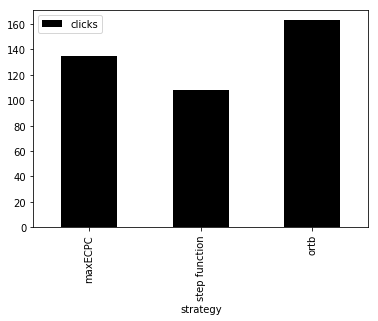

In [27]:
data.plot(kind='bar',color='black',y='clicks',x='strategy')

In [26]:
data['score'] = (2 * data['CTR'].apply(float) * data['clicks']) / (data['CPC'].apply(float) * data['CPM'].apply(float) * data['spent'].apply(float))
data

,CPC,CPM,CTR,clicks,imps,spent,strategy,score
0,46.2959,57.4349,0.1241,135,108818,6249.948,maxECPC,0.000002
6,57.8696,160,0.276484,108,39062,6249.920,step function,0.000001
0,32.0518,41.6307,0.1299,163,125495,5224.443,ortb,0.000006
